In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

In [6]:
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x124d339d0>,
 'id': 1,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

In [11]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x134894610>,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'prcp': 0.08,
 'id': 1,
 'tobs': 65.0}

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Most recent date in the dataset
most_recent_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
year_ago = most_recent_date - dt.timedelta(days=365)
print(year_ago)

2016-08-23


In [14]:
# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date >= year_ago).all()

# Display the precipitation data
for date, prcp in precipitation_data:
    print(f"Date: {date}, Precipitation: {prcp}")


Date: 2016-08-23, Precipitation: 0.0
Date: 2016-08-24, Precipitation: 0.08
Date: 2016-08-25, Precipitation: 0.08
Date: 2016-08-26, Precipitation: 0.0
Date: 2016-08-27, Precipitation: 0.0
Date: 2016-08-28, Precipitation: 0.01
Date: 2016-08-29, Precipitation: 0.0
Date: 2016-08-30, Precipitation: 0.0
Date: 2016-08-31, Precipitation: 0.13
Date: 2016-09-01, Precipitation: 0.0
Date: 2016-09-02, Precipitation: 0.0
Date: 2016-09-03, Precipitation: 0.0
Date: 2016-09-04, Precipitation: 0.03
Date: 2016-09-05, Precipitation: None
Date: 2016-09-06, Precipitation: None
Date: 2016-09-07, Precipitation: 0.05
Date: 2016-09-08, Precipitation: 0.0
Date: 2016-09-09, Precipitation: 0.03
Date: 2016-09-10, Precipitation: 0.0
Date: 2016-09-11, Precipitation: 0.05
Date: 2016-09-12, Precipitation: 0.0
Date: 2016-09-13, Precipitation: 0.02
Date: 2016-09-14, Precipitation: 1.32
Date: 2016-09-15, Precipitation: 0.42
Date: 2016-09-16, Precipitation: 0.06
Date: 2016-09-17, Precipitation: 0.05
Date: 2016-09-18, Preci

In [15]:
# Save the query results as a Pandas DataFrame with explicit column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Display the first few rows of the DataFrame
precipitation_df.head()


,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [16]:
# Sort the DataFrame by date
precipitation_df_sorted = precipitation_df.sort_values(by='Date')

# Display the sorted DataFrame
precipitation_df_sorted.head()


,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


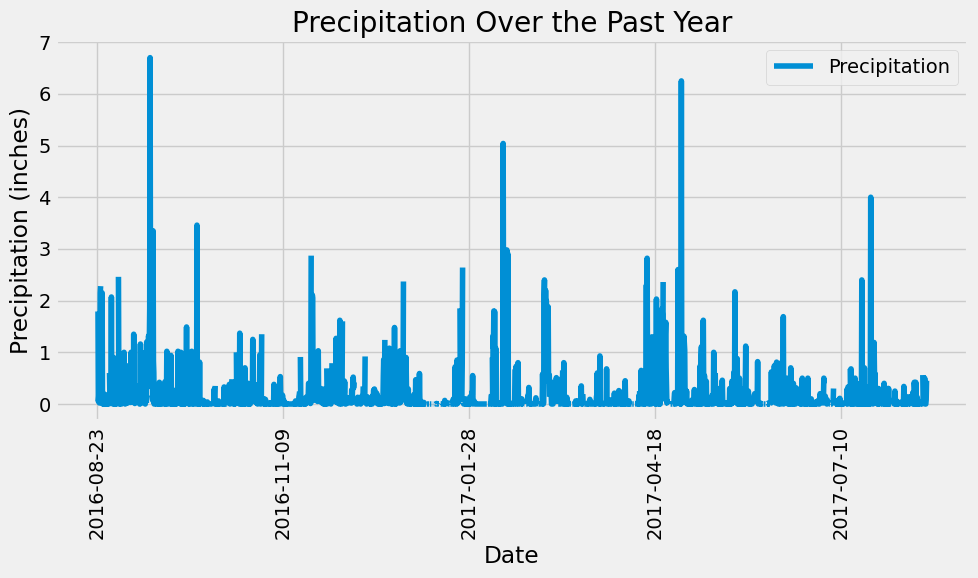

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data

precipitation_df_sorted.plot(x='Date', y='Precipitation', figsize=(10,6))
plt.title("Precipitation Over the Past Year")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = precipitation_df_sorted['Precipitation'].describe()

# Display the summary statistics
print(summary_statistics)


count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
print(total_stations)

[(9,)]


In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

most_active_stations = session.query(Station.station, func.count(Station.station)).\
                        filter(Measurement.station==Station.station).\
                        group_by(Station.station).\
                        order_by(func.count(Station.station).desc()).all()

for station, row_count in most_active_stations:
    print((station, row_count))

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature
most_active_station_id = most_active_stations[0][0]

# Query to calculate lowest, highest, and average temperature for the most active station
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                     filter(Measurement.station==Station.station).\
                     filter(Station.station == most_active_station_id).all()

# Print the result 
print(temperature_stats)

[(54.0, 85.0, 71.66378066378067)]


In [22]:
# Query to retrieve the last 12 months of temperature observation data for the most active station
temperature_data = session.query(Measurement.date, Measurement.tobs).\
                    filter(Measurement.station==Station.station).\
                    filter(Station.station == most_active_station_id).\
                    filter(Measurement.date >= year_ago).all()

for station, temp in temperature_data :
    print(station,temp)

2016-08-23 77.0
2016-08-24 77.0
2016-08-25 80.0
2016-08-26 80.0
2016-08-27 75.0
2016-08-28 73.0
2016-08-29 78.0
2016-08-30 77.0
2016-08-31 78.0
2016-09-01 80.0
2016-09-02 80.0
2016-09-03 78.0
2016-09-04 78.0
2016-09-05 78.0
2016-09-06 73.0
2016-09-07 74.0
2016-09-08 80.0
2016-09-09 79.0
2016-09-10 77.0
2016-09-11 80.0
2016-09-12 76.0
2016-09-13 79.0
2016-09-14 75.0
2016-09-15 79.0
2016-09-16 78.0
2016-09-17 79.0
2016-09-18 78.0
2016-09-19 78.0
2016-09-20 76.0
2016-09-21 74.0
2016-09-22 77.0
2016-09-23 78.0
2016-09-24 79.0
2016-09-25 79.0
2016-09-26 77.0
2016-09-27 80.0
2016-09-28 78.0
2016-09-29 78.0
2016-09-30 78.0
2016-10-01 77.0
2016-10-02 79.0
2016-10-03 79.0
2016-10-04 79.0
2016-10-05 79.0
2016-10-06 75.0
2016-10-07 76.0
2016-10-08 73.0
2016-10-09 72.0
2016-10-10 71.0
2016-10-11 77.0
2016-10-12 79.0
2016-10-13 78.0
2016-10-14 79.0
2016-10-15 77.0
2016-10-16 79.0
2016-10-17 77.0
2016-10-18 78.0
2016-10-19 78.0
2016-10-20 78.0
2016-10-21 78.0
2016-10-22 77.0
2016-10-23 74.0
2016-10-

In [23]:
# Convert the query result to a DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=['Date', 'Temperature'])
temperature_df

,Date,Temperature
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


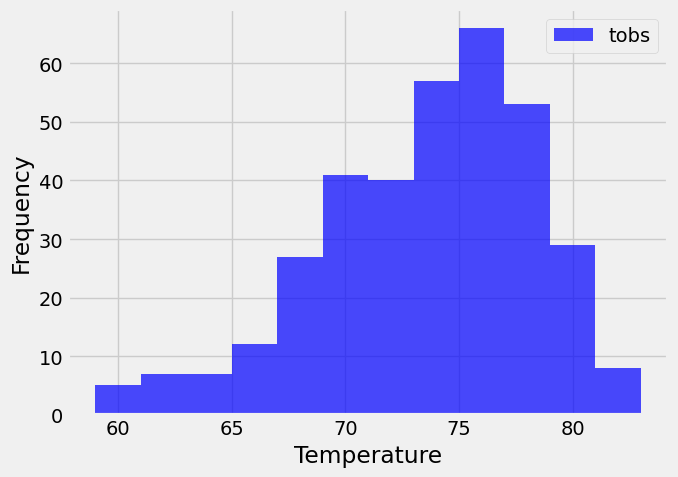

In [24]:

# Plot the results as a histogram
plt.figure(figsize=(7, 5))
plt.hist(temperature_df['Temperature'], bins=12, color='b', alpha=0.7)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"], loc="upper right")
plt.tight_layout()
plt.show()


In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [26]:
# Close Session
session.close()